In [ ]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 11 # the lower limit of qubits for the circuit
steps= 2 #jump in qubit numbers
name_of_algo='qaoa_fermionic'

In [2]:
#all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
#selected_fakes = random.sample(all_fakes, f)
#selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list
selected_fakes=[FakeBoeblingenV2,FakeRomeV2,FakeGeneva,FakeTorontoV2,FakeRochesterV2]

In [ ]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'qaoa_fermionic3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_fermionic5': [0.4, 0.5, 0.6, 0.7391304347826086, 0.0, 0.2934782608695652], 'qaoa_fermionic7': [0.2857142857142857, 0.3333333333333333, 0.6428571428571429, 0.7741935483870968, 0.0, 0.3602150537634408], 'qaoa_fermionic9': [0.2222222222222222, 0.25, 0.6666666666666666, 0.7948717948717948, 0.0, 0.3942307692307693]}


In [5]:
import time
import pandas as pd
from IPython.display import display
jobs =[]
data=[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        timetaken=[]
        for i in range(0,1):
            start=time.time()
            job = backend().run(circuit, shots=1000)
            result = job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            end=time.time()-start
            score_list.append(score)
            t=job.result(0).time_taken
            timetaken.append(t)
            #print(label ," ExecutionTime:",t,"& Total time:",end)
            print(i+1,"th iteration ,", label ,", Execution time::",t, ", Total Time Taken ::",end )
        print("------------------------------------------")
        score = np.mean(score_list) 
        sd = np.std(score_list)
        execution_time = np.mean(timetaken)
        dictionary={}
        dictionary["Backend_Time"]=backend().name
        dictionary["Ciruit_Name"]=label    
        dictionary["Execution_Time"]=execution_time
        dictionary["Total_Time"]=end
        data.append(dictionary)
        jobs.append((label,benchmark,backend,job,score,sd,execution_time,end))
#jobs
df = pd.DataFrame(data)
display(df)
df.to_excel(r"./output_Qaoa_Fermionic.xlsx", index=False)

=============SCORES OF ALL THE CIRCUITS=============
BACKEND-NAME ::  fake_boeblingen
1 th iteration , qaoa_fermionic3 , Execution time:: 0.15488028526306152 , Total Time Taken :: 0.4799046516418457
------------------------------------------
1 th iteration , qaoa_fermionic5 , Execution time:: 0.14565730094909668 , Total Time Taken :: 0.3687894344329834
------------------------------------------
1 th iteration , qaoa_fermionic7 , Execution time:: 0.10137033462524414 , Total Time Taken :: 0.41402459144592285
------------------------------------------
1 th iteration , qaoa_fermionic9 , Execution time:: 0.09114289283752441 , Total Time Taken :: 0.4263803958892822
------------------------------------------
BACKEND-NAME ::  fake_rome
1 th iteration , qaoa_fermionic3 , Execution time:: 0.017388582229614258 , Total Time Taken :: 0.07210707664489746
------------------------------------------
1 th iteration , qaoa_fermionic5 , Execution time:: 0.02023029327392578 , Total Time Taken :: 0.16751861

,Backend_Time,Ciruit_Name,Execution_Time,Total_Time
0,fake_boeblingen,qaoa_fermionic3,0.154880,0.479905
1,fake_boeblingen,qaoa_fermionic5,0.145657,0.368789
2,fake_boeblingen,qaoa_fermionic7,0.101370,0.414025
3,fake_boeblingen,qaoa_fermionic9,0.091143,0.426380
4,fake_rome,qaoa_fermionic3,0.017389,0.072107
5,fake_rome,qaoa_fermionic5,0.020230,0.167519
6,fake_rome,qaoa_fermionic7,0.032939,0.090444
7,fake_rome,qaoa_fermionic9,0.044161,0.109499
8,fake_geneva,qaoa_fermionic3,0.276070,0.777959
9,fake_geneva,qaoa_fermionic5,0.153104,0.688550


In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd,exec,tot in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.88400001460344


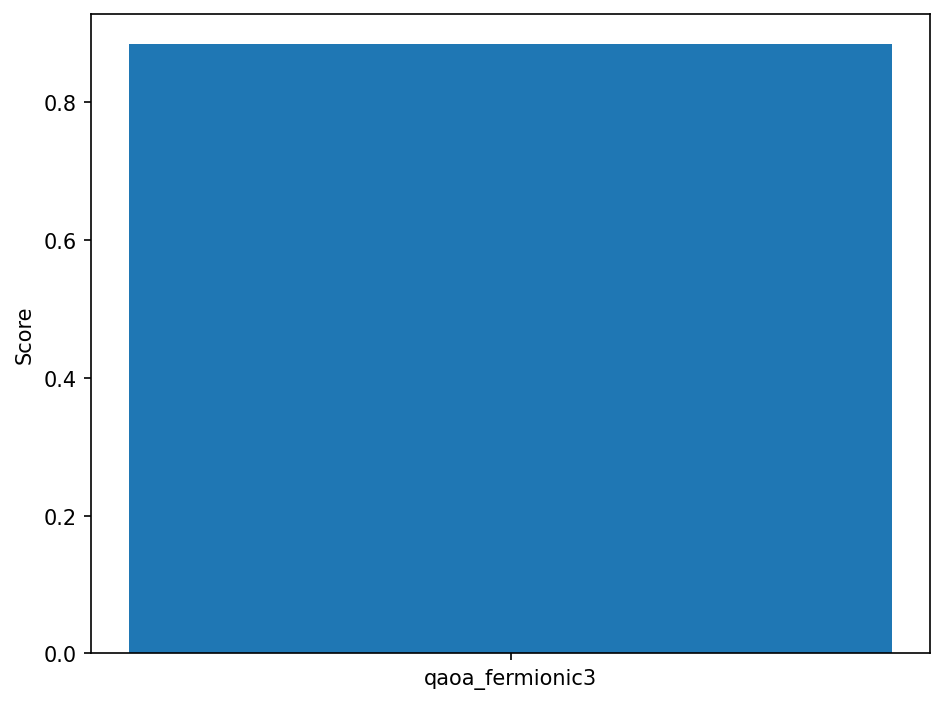

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.5267001019994437


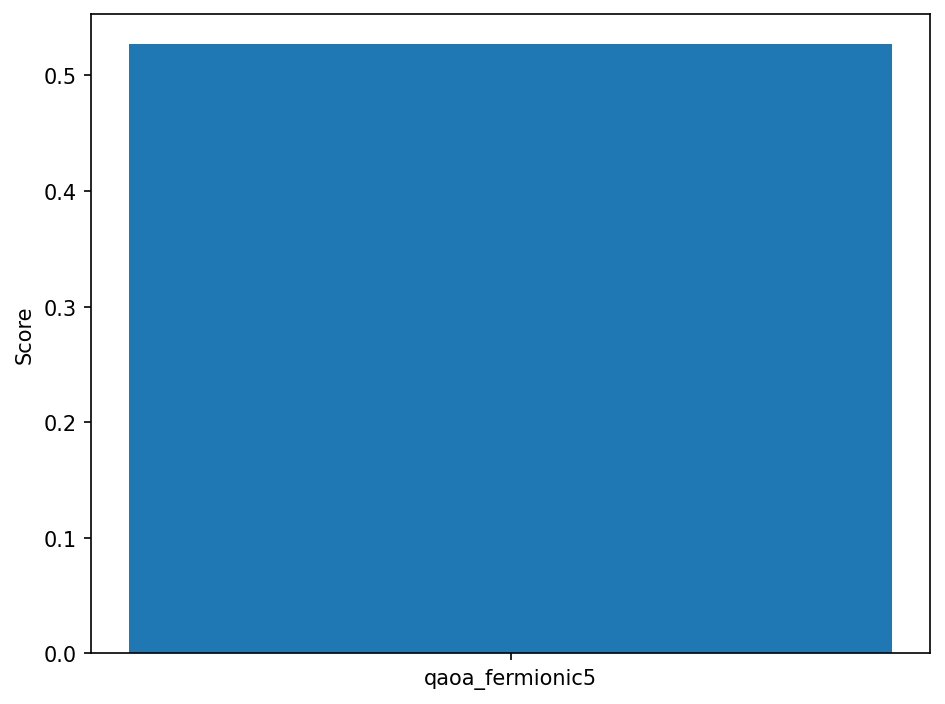

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.42761286252472774


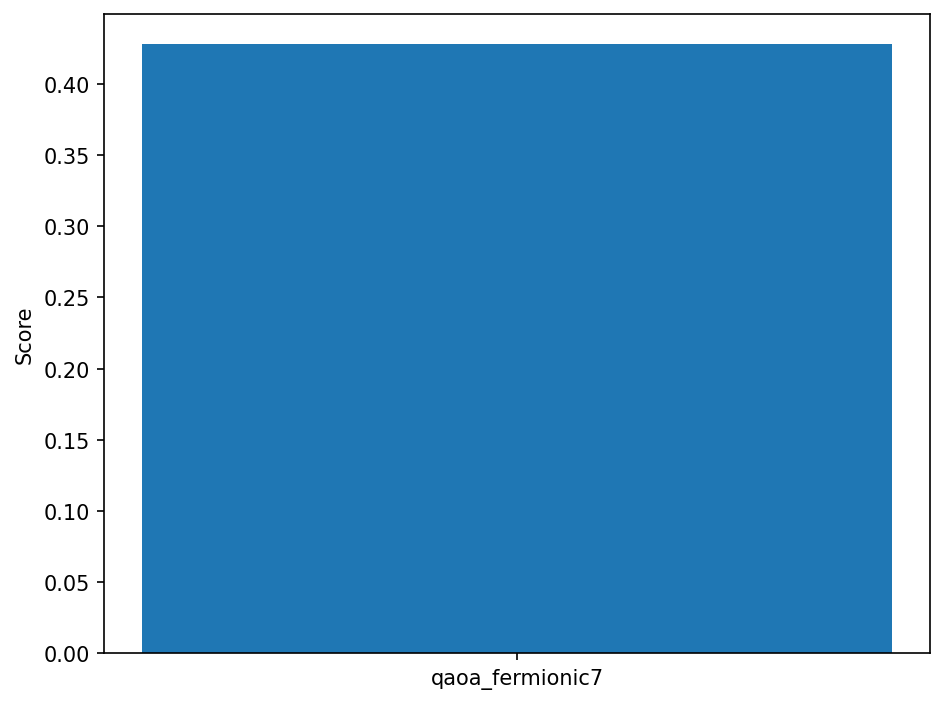

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5523305790587543


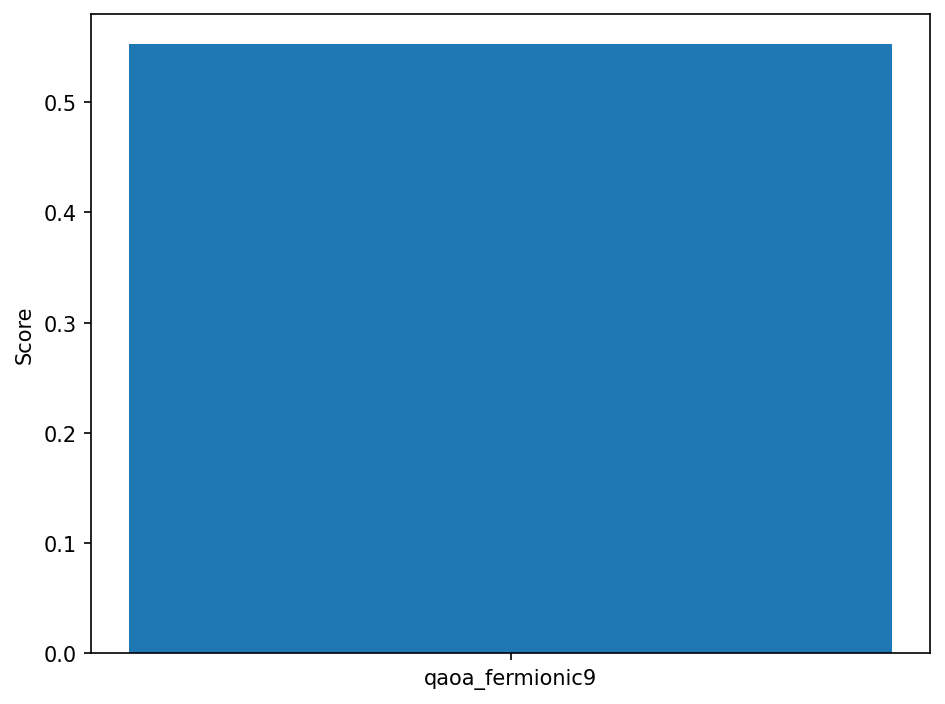

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.9060000154400955


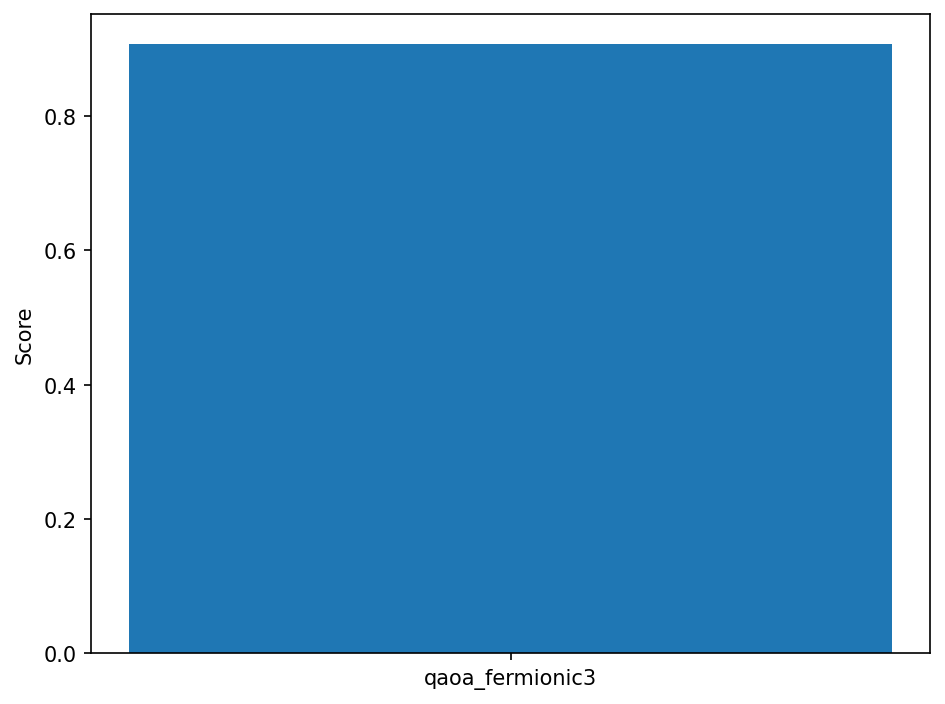

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.5295106390520167


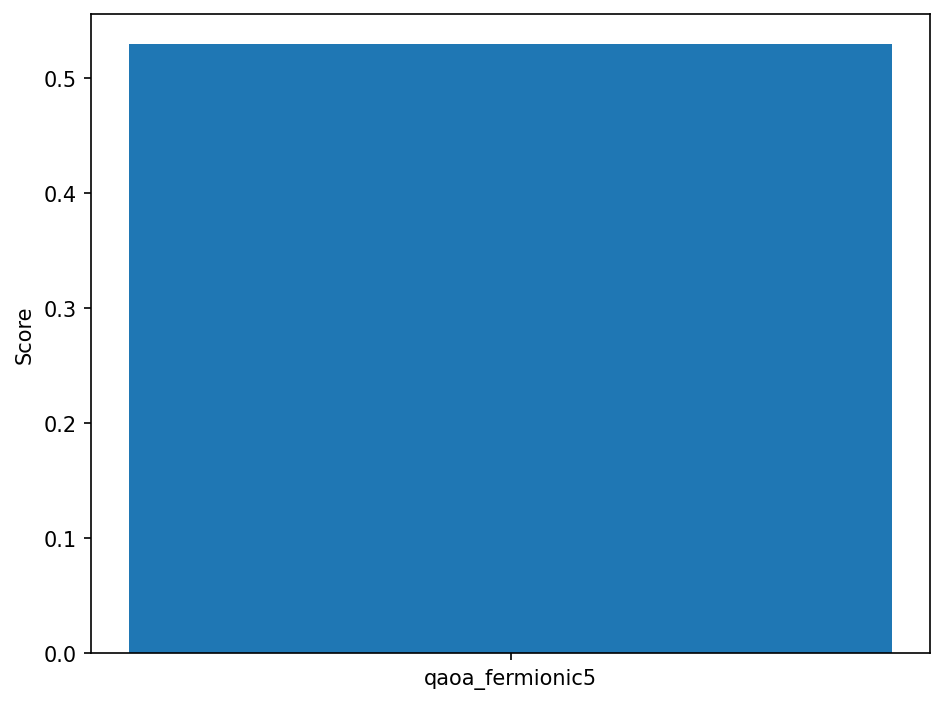

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.4546229884483368


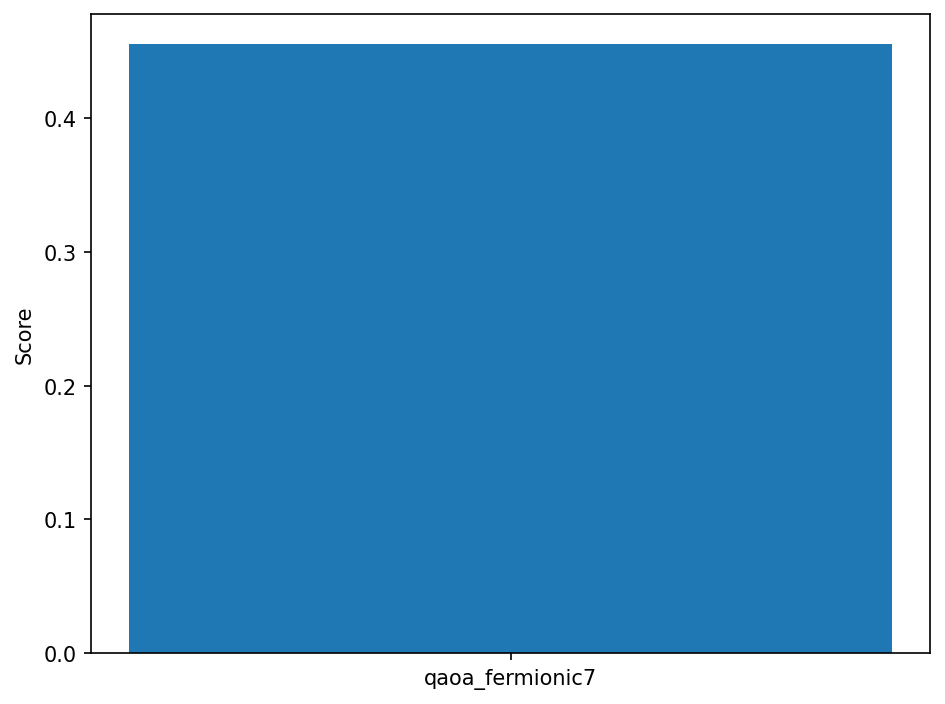

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5918455061031198


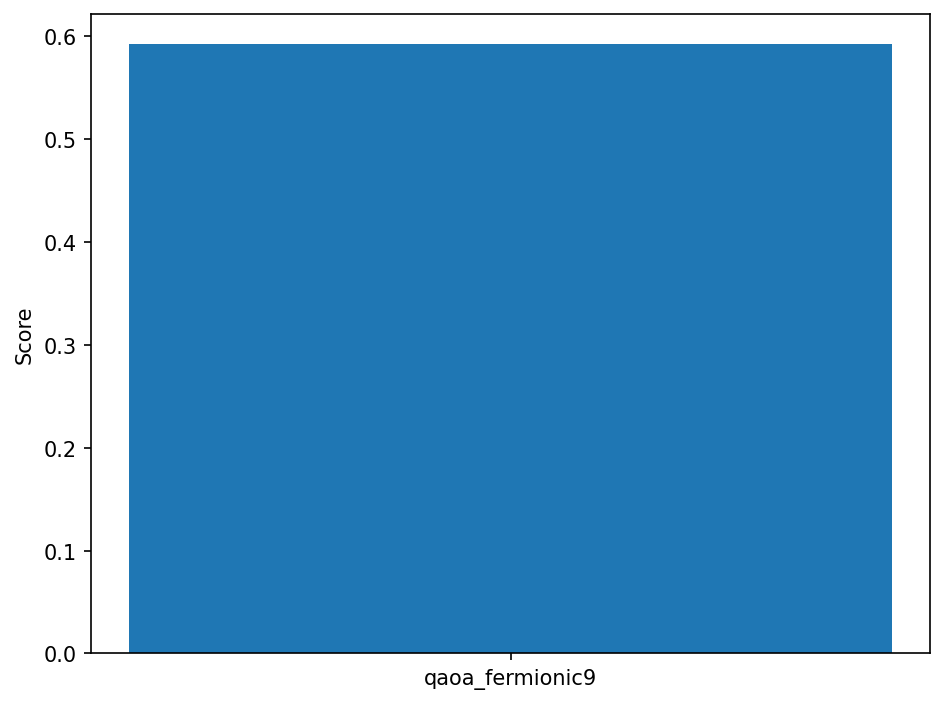

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.9280000162767509


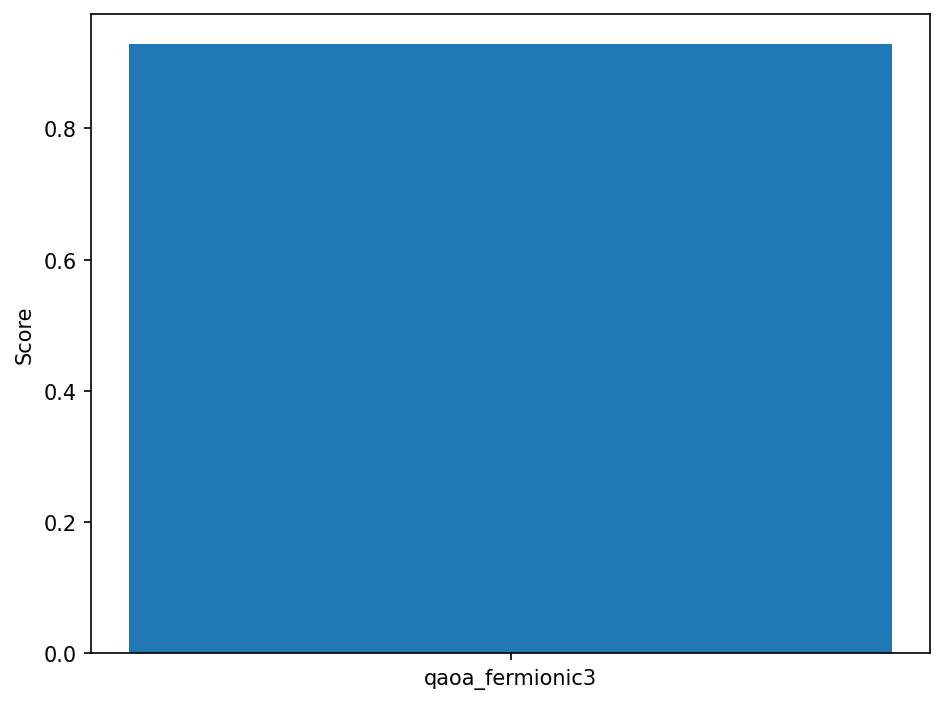

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.5400501529991655


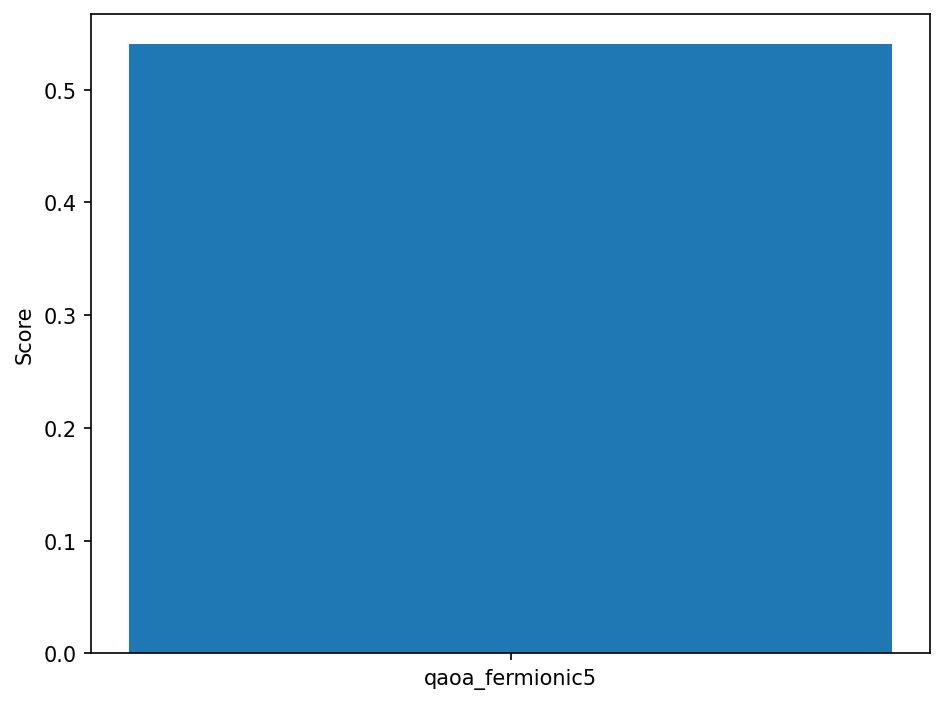

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.47082906400250224


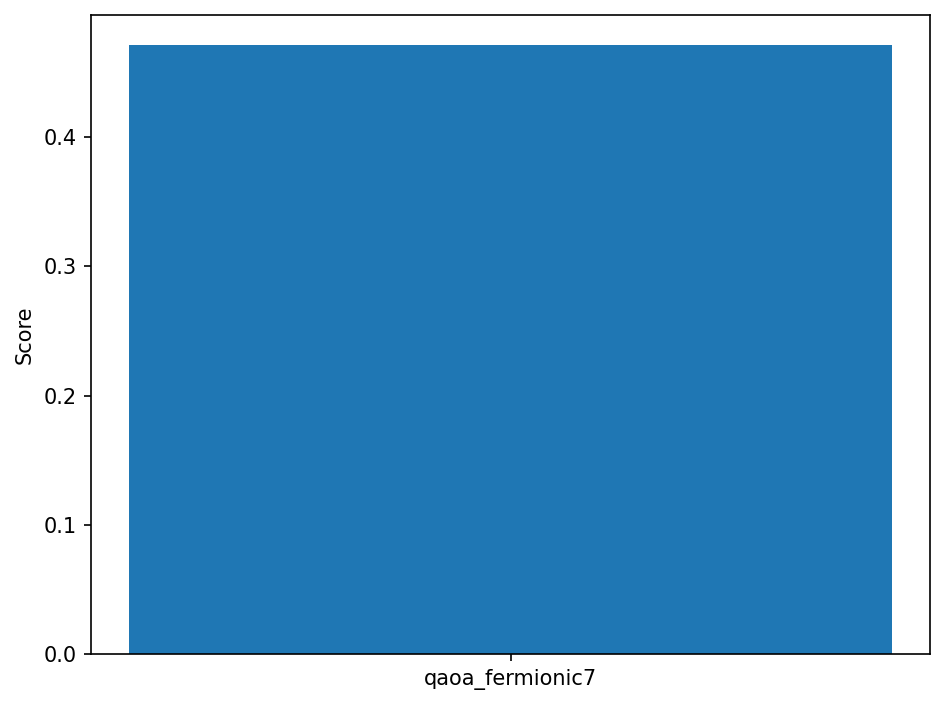

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5803648178402298


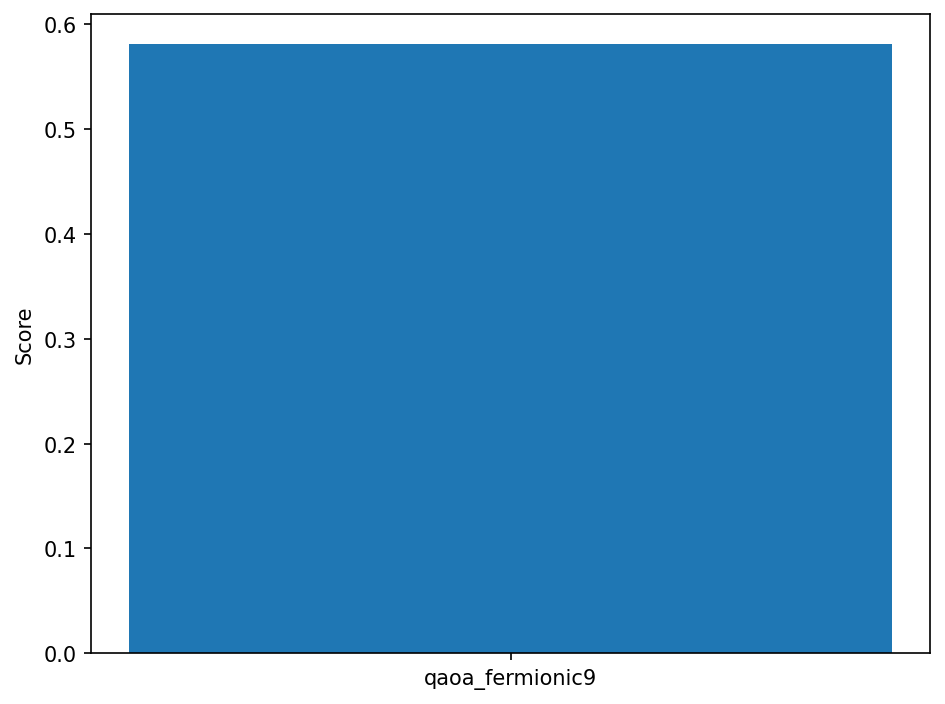

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.654000005856588


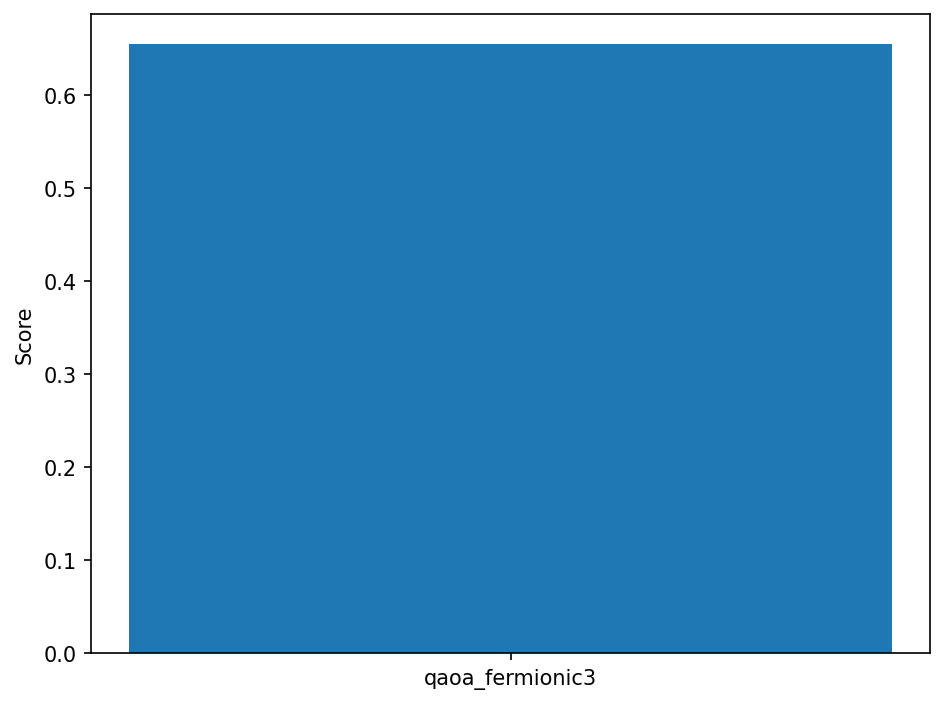

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.5049184398420028


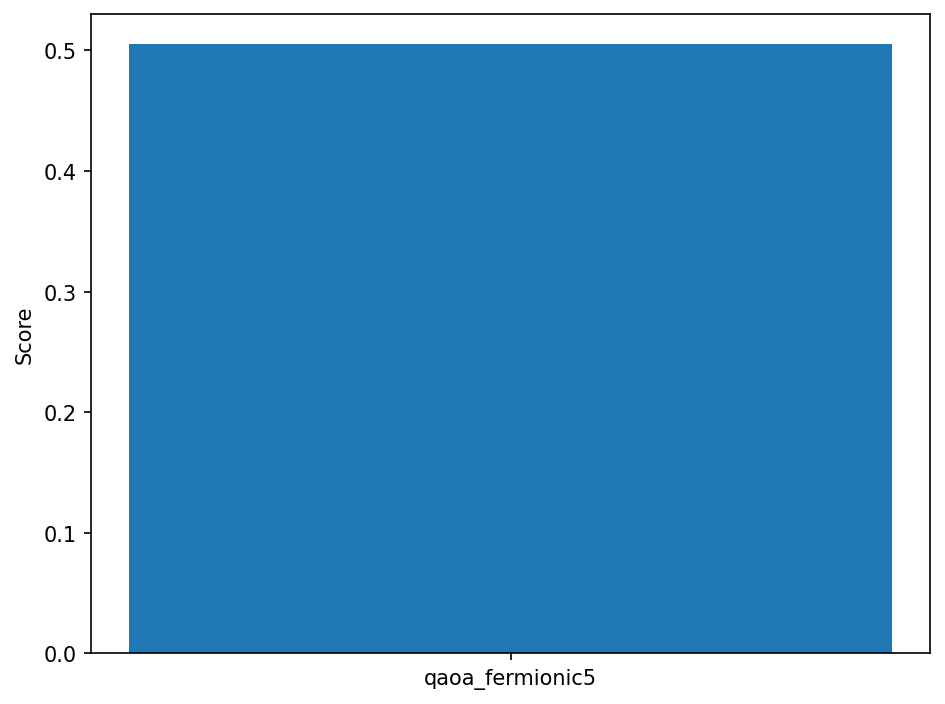

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.5187270206403689


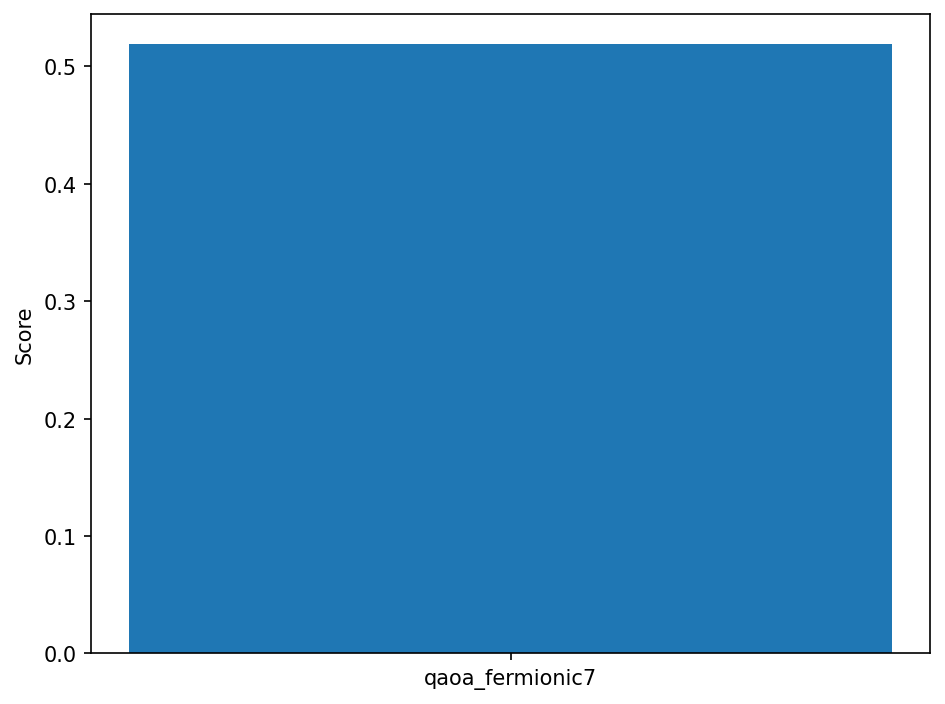

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5130826447646886


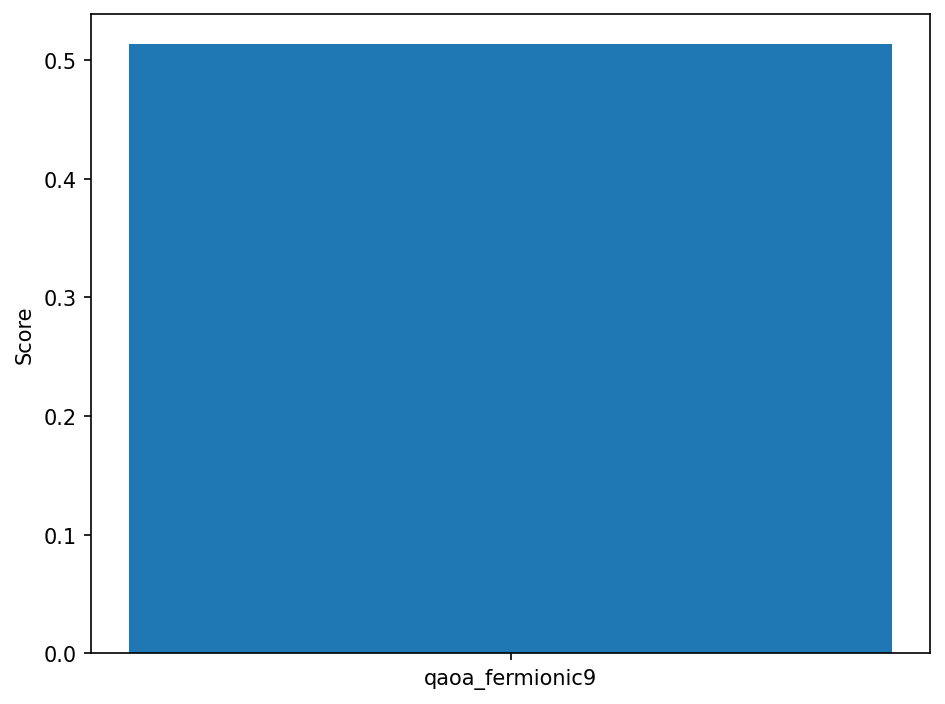

-----------------------------------------------------------
USED BACKEND:: fake_rochester ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.6100000041832772


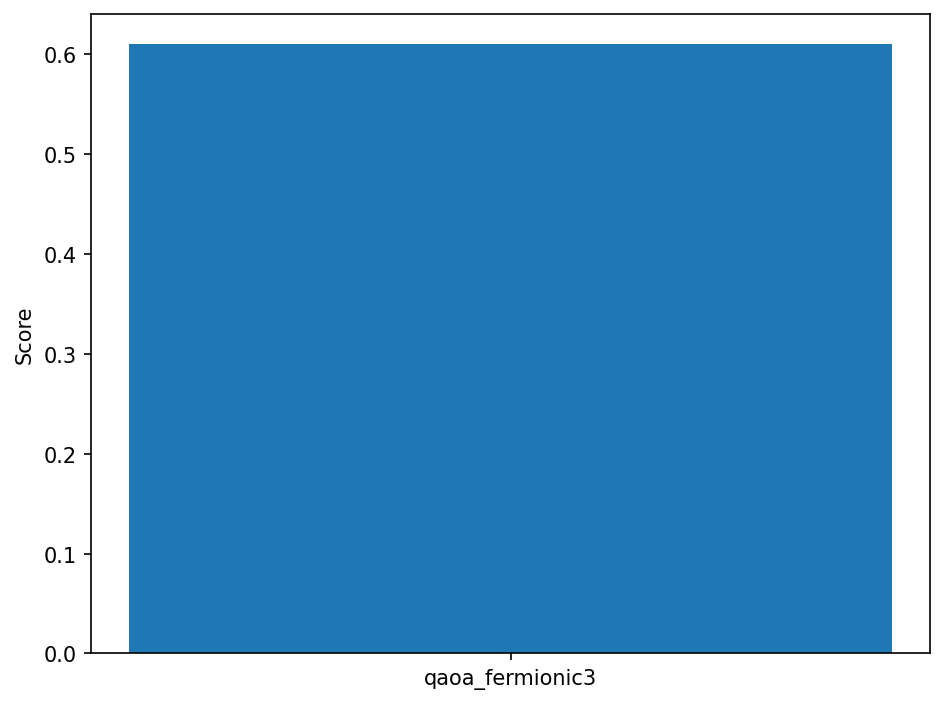

-----------------------------------------------------------
USED BACKEND:: fake_rochester ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.5133500509997218


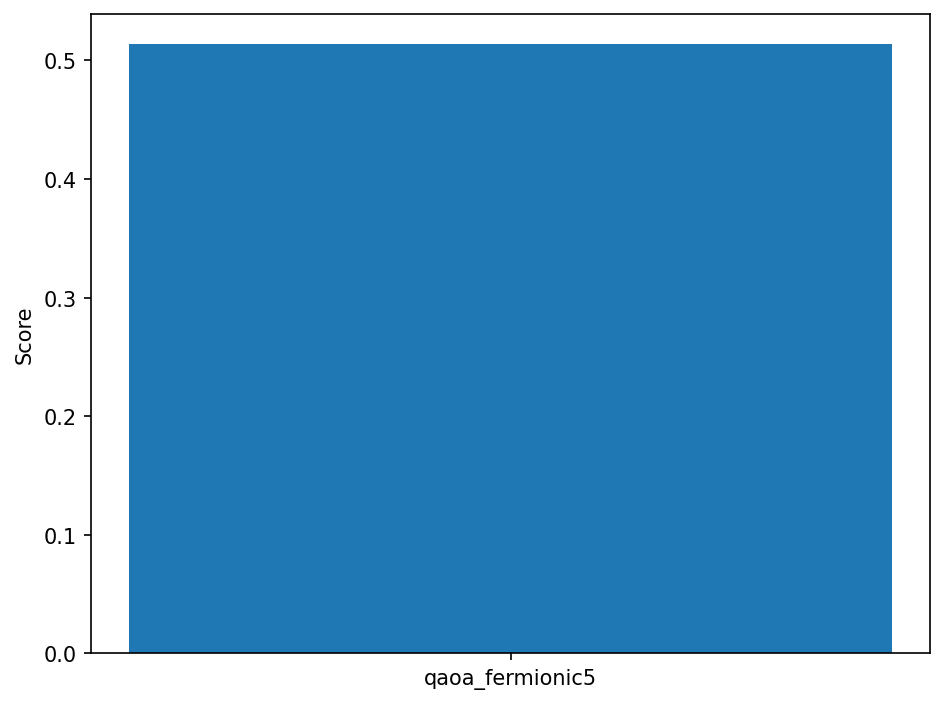

-----------------------------------------------------------
USED BACKEND:: fake_rochester ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.5043216201477774


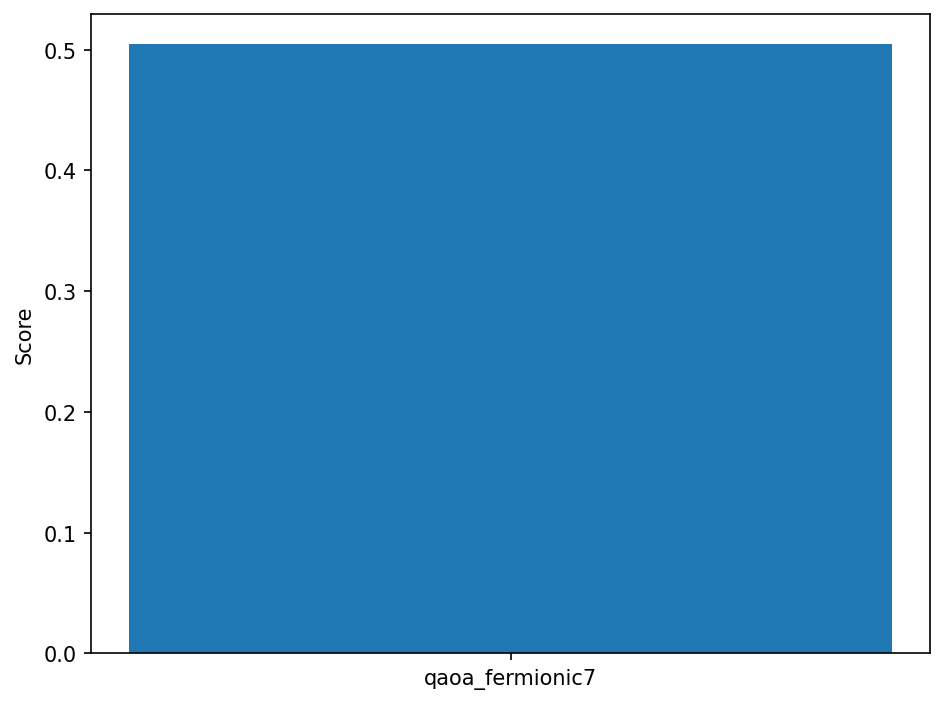

-----------------------------------------------------------
USED BACKEND:: fake_rochester ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5088107607598923


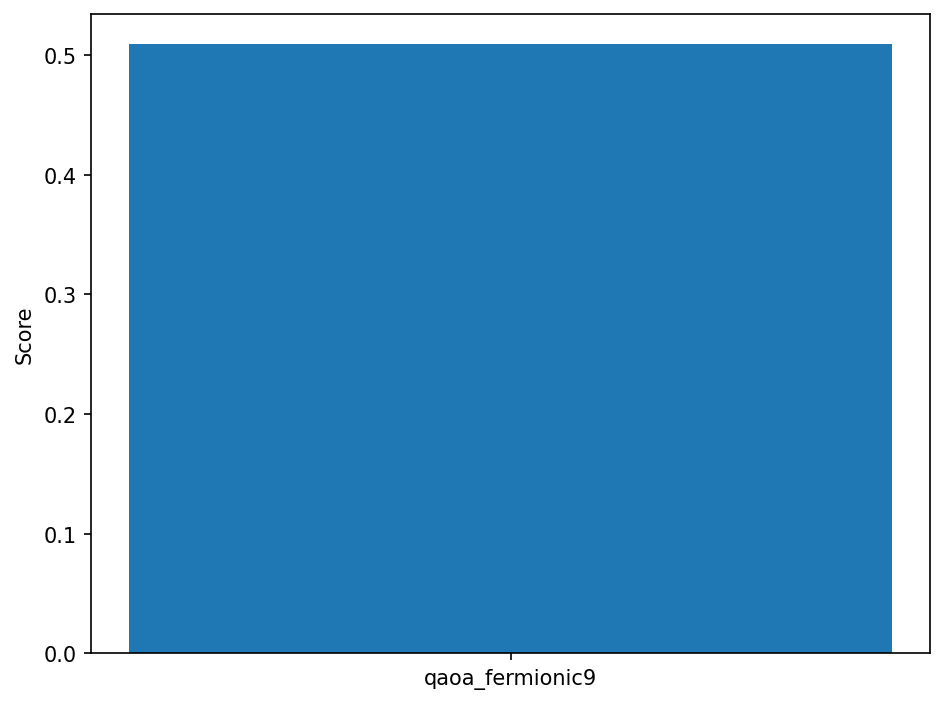

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd,exec,tot in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

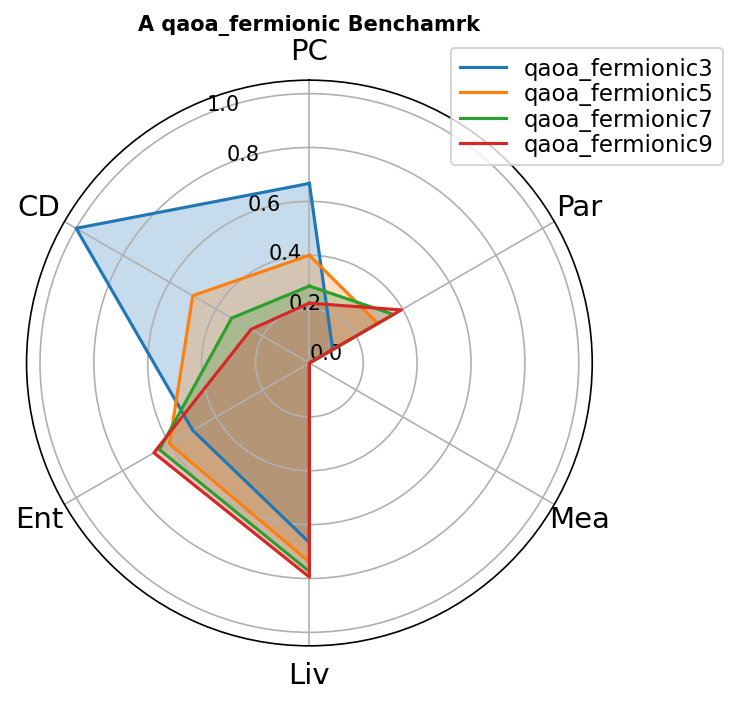

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

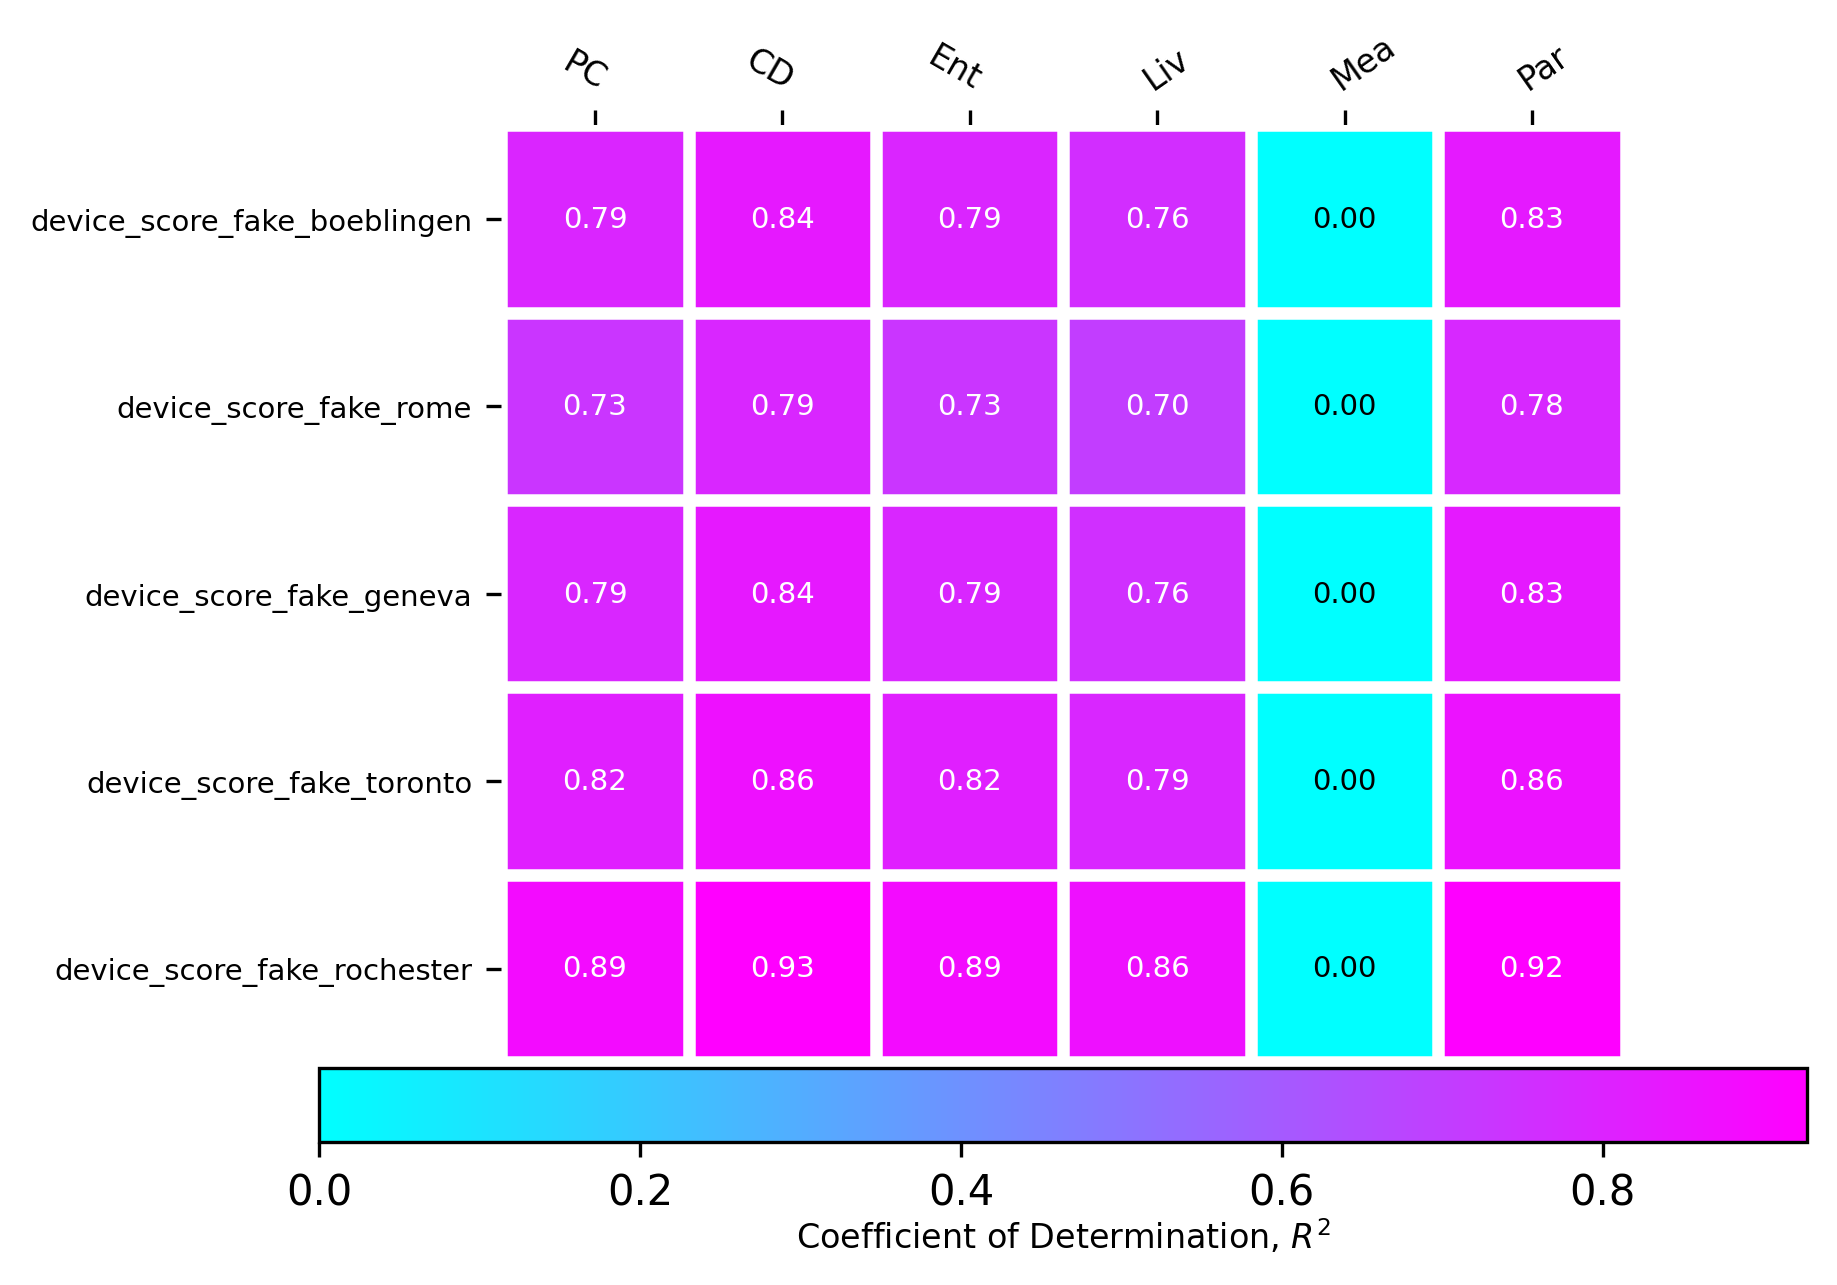

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

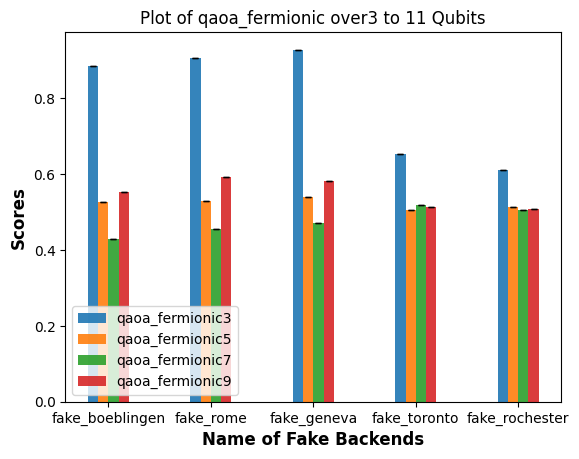

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
v='Plot of '+name_of_algo+' over'+str(lower_limit)+' to '+str(upper_limit)+ ' Qubits'
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd,exec,tot in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title(v)
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()

In [11]:
import resource
def get_memory():
    usage = resource.getrusage(resource.RUSAGE_SELF)
    max_mem = usage.ru_maxrss/1024 #in MB
    return max_mem
get_memory()

663.734375